# Importing Required Python Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# # Libraries used for comparing accuracies with my model implementations
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Preprocessing of Given Data:-

## 1. Loading Data Set

In [61]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
data = pd.read_csv('./abalone.data',names=columns)

## 2. Checking few rows of data

In [62]:
data.head(10)

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


## 3. General Description of Data

In [63]:
data.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 4. Checking number of rows with 'NaN'/Null value in each column

In [64]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [65]:
(data == '?').sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

## 5. Checking for count of unique values for each column

### The Data Set has good number of unique values in most of features such as 'Whole Weight', 'Shucked Weight', 'Shell Weight', 'Viscera Weight'. It is better to use these features for single feature models.

In [66]:
data.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole Weight      2429
Shucked Weight    1515
Viscera Weight     880
Shell Weight       926
Rings               28
dtype: int64

## 6. Value Counts of Rings (Output Classes)

### The number of rows are varying by alot, will need to merge classes with low number of rows for better trained model.

In [67]:
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

## 7. One-Hot Encoding for column 'Sex'

In [68]:
column_names = ['Sex']
data = pd.get_dummies(data,columns=column_names)

# Exploratory Data Analysis

## Checking for Correlation

### Alot of features are correlated with each other, will have to perform trial and error for better trained model. Feature 'Height' is least correlated with rest of the features, hence it will be better to include it in feature set. Feature 'Shell Weight' is most correlated with the output label 'Rings', hence it will be better to include it in feature set.

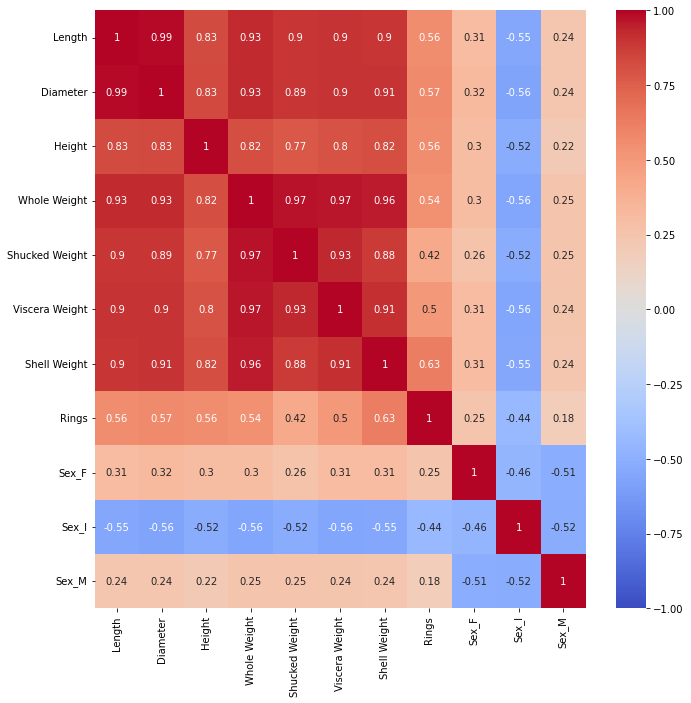

In [69]:
plt.figure(figsize=(11,11))
sns.heatmap(data.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

## Box Plots

### Clearly there are outliers in every feature, will have to perform outlier removal

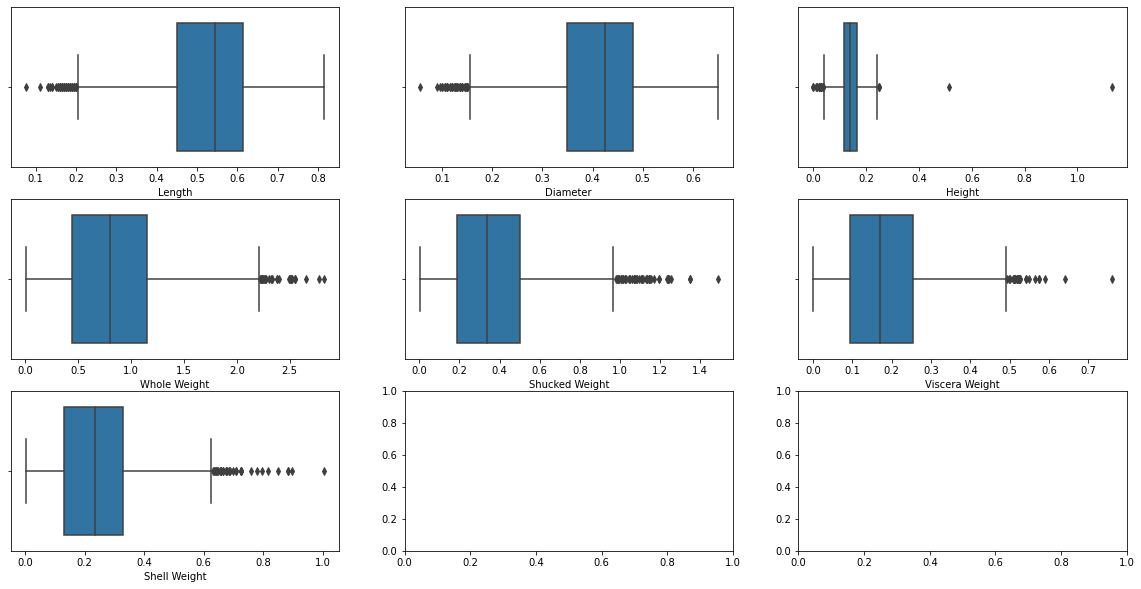

In [70]:
fig,axis = plt.subplots(3,3,figsize=(20,10))
sns.boxplot(ax=axis[0,0],x=data.iloc[:,0])
sns.boxplot(ax=axis[0,1],x=data.iloc[:,1])
sns.boxplot(ax=axis[0,2],x=data.iloc[:,2])
sns.boxplot(ax=axis[1,0],x=data.iloc[:,3])
sns.boxplot(ax=axis[1,1],x=data.iloc[:,4])
sns.boxplot(ax=axis[1,2],x=data.iloc[:,5])
sns.boxplot(ax=axis[2,0],x=data.iloc[:,6])
plt.show()

### Outlier Remover Class

In [71]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

### Removing of Outliers from every Feature

In [72]:
for i in range(7):
    temp = OutlierRemoval(data.iloc[:,i].quantile(0.25),data.iloc[:,i].quantile(0.75))
    data.iloc[:,i] = data.iloc[:,i].apply(temp.removeOutlier)

### Final Result of Box Plots

#### Now Features are clear of outliers.

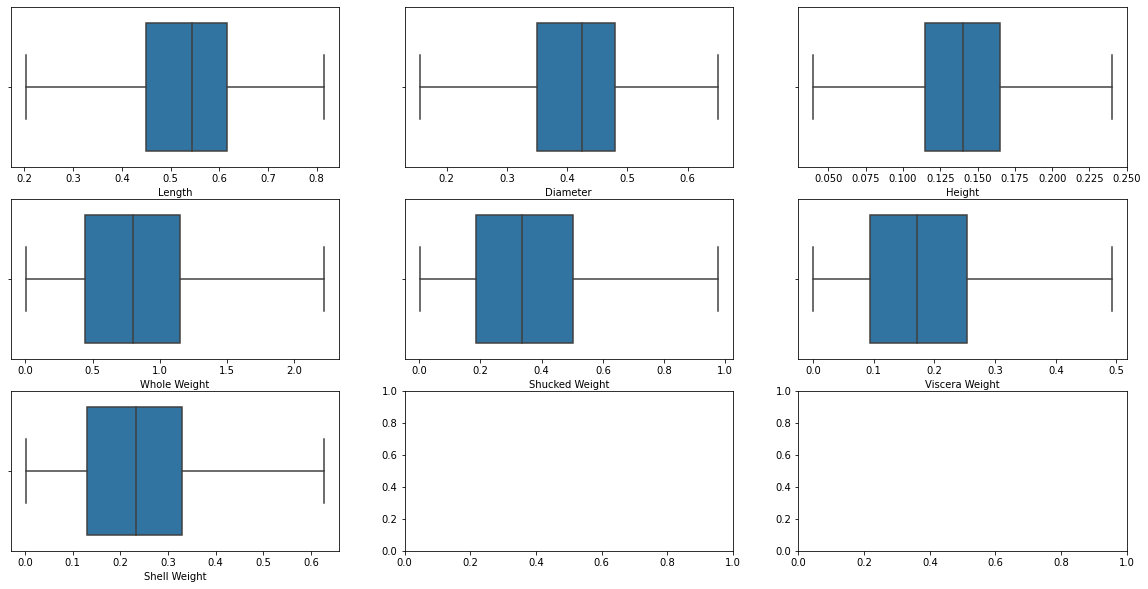

In [73]:
fig,axis = plt.subplots(3,3,figsize=(20,10))
sns.boxplot(ax=axis[0,0],x=data.iloc[:,0])
sns.boxplot(ax=axis[0,1],x=data.iloc[:,1])
sns.boxplot(ax=axis[0,2],x=data.iloc[:,2])
sns.boxplot(ax=axis[1,0],x=data.iloc[:,3])
sns.boxplot(ax=axis[1,1],x=data.iloc[:,4])
sns.boxplot(ax=axis[1,2],x=data.iloc[:,5])
sns.boxplot(ax=axis[2,0],x=data.iloc[:,6])
plt.show()

# Function to Split Data

In [74]:
def split_data_stratify(x:np.ndarray,y:np.ndarray,ratio:float) -> tuple:
    """Splits the data set in stratified manner into training and test data

    Args:
        x (np.ndarray): Features of data set
        y (np.ndarray): Output label
        ratio (float): Ratio of sizes of training & test data

    Returns:
        tuple: (train_x, test_x, train_y, test_y)
    """
    train_x, test_x, train_y, test_y = [], [], [], []
    for k in np.unique(y):
        arr = np.where(y == k)
        border = int(ratio*len(arr[0]))
        order = np.random.permutation(arr[0])
        train, test = order[:border], order[border:]
        for i in train:
            train_x.append(x[i])
            train_y.append(y[i])
        for i in test:
            test_x.append(x[i])
            test_y.append(y[i])
    return np.array(train_x), np.array(test_x), np.array(train_y), np.array(test_y)

# ----------------------------------Logistic Regression-----------------------------------

## ------------------------------------------Univariate Section------------------------------------------

### DataFrame for Univariate Section

In [75]:
uni_data = data.copy()

### We are trying to predict, given features, it belongs to class 20 or not, hence we merge all classes except 20. 
### Class: 20->1, Rest of the Classes->0

In [76]:
for i in range(len(uni_data)):
    if uni_data.at[i,'Rings'] == 20:
        uni_data.at[i,'Rings'] = 1
    else:
        uni_data.at[i,'Rings'] = 0
uni_data['Rings'].value_counts()

0    4151
1      26
Name: Rings, dtype: int64

### Data Splitting

#### Taking 'Shell Weight' as feature since it is the most correlated and has good number of unique values to output label 'Rings'

In [77]:
x = uni_data['Shell Weight'].to_numpy().astype(np.float64)
x = x.reshape(-1,1)
y = uni_data['Rings'].to_numpy().astype(np.float64)
train_x,test_x,train_y,test_y = split_data_stratify(x,y,0.6)

### Sklearn - Univariate Logistic Regression [Implemented for Comparision]

#### Model to Predict Output Label 'Rings'

In [78]:
skmodel = LogisticRegression()
skmodel.fit(train_x,train_y)

LogisticRegression()

#### Prediction

In [79]:
train_yhat = skmodel.predict(train_x)
test_yhat = skmodel.predict(test_x)

#### Accuracy Score

##### For Training Data

In [80]:
accuracy_score(train_y,train_yhat)

0.9940119760479041

##### For Test Data

In [81]:
accuracy_score(test_y,test_yhat)

0.993421052631579

### My Implementation - Univariate Logistic Regression

In [82]:
class UnivariateLogisticRegression:
    def __init__(self,threshold:float=0.5) -> None:
        """Constructor

        Args:
            threshold (float, optional): Threshold to decide which output class. Defaults to 0.5.
        """
        self.w = np.ones((2,1),dtype=np.float64)
        self.threshold = threshold
        
    def sigmoid(self,num:float) -> float:
        """Calculates the sigmoid function for input `num`

        Args:
            num (float): Input number

        Returns:
            float: Value of sigmoid function
        """
        return 1/(1 + np.exp(-num))
        
    def gradient_ascent_fit(self,train_x:np.ndarray,train_y:np.ndarray,alpha:float) -> None:
        """Perform Gradient-Ascent to fit the Univariate Logistic Model for the input features

        Args:
            train_x (np.ndarray): Training features
            train_y (np.ndarray): Training output labels
            alpha (float): Learning rate
        """
        x = np.hstack((train_x,np.ones((len(train_x),1))))
        for _ in range(100):
            djdw = np.zeros((2,1))
            for i in range(len(x)):
                djdw += x[i].reshape(len(x[i]),1)*(train_y[i] - self.sigmoid(np.dot(x[i],self.w)))
            self.w += alpha*djdw
        self.w = self.w.flatten()
        
    def predict(self,test_x:np.ndarray) -> np.ndarray:
        """Predicts the output class for the input features

        Args:
            test_x (np.ndarray): Test features

        Returns:
            np.ndarray: Predicted output labels
        """
        x = np.hstack((test_x,np.ones((len(test_x),1))))
        y = []
        for xi in x:
            c1 = self.sigmoid(np.dot(xi,self.w))
            if c1 >= self.threshold:
                y.append(1)
            else:
                y.append(0)
        return np.array(y)

#### Gradient Ascent for Univariate Logistic Regression: 'Shell Weight' -> 'Rings'

##### Model to Predict Output Label 'Rings'

In [83]:
unilogmodel = UnivariateLogisticRegression()
unilogmodel.gradient_ascent_fit(train_x,train_y,0.01)

##### Prediction

In [84]:
yhat_train = unilogmodel.predict(train_x)
yhat_test = unilogmodel.predict(test_x)

##### Accuracy Score

For Training Data

In [85]:
accuracy_score(train_y,yhat_train)

0.9940119760479041

For Test Data

In [86]:
accuracy_score(test_y,yhat_test)

0.993421052631579

##### Plot of Trained Logistic Regression Model

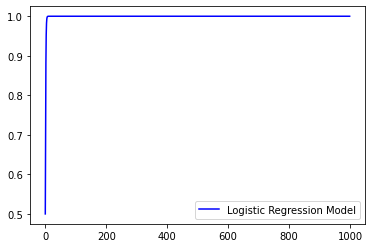

In [87]:
x = [i for i in range(1000)]
y = [unilogmodel.sigmoid(i) for i in x]
plt.plot(x,y,color='blue',label='Logistic Regression Model')
plt.legend()
plt.show()

### Table of Accuracy Scores

|Model|Accuracy Score-Training|Accuracy Score-Test|
|-|-|-|
|Sklearn|0.9940119760479041|0.993421052631579|
|My Model Logistic Regression|0.9940119760479041|0.993421052631579|

## -----------------------------------------Multivariate Section-----------------------------------------

### DataFrame for Multivariate Section

In [88]:
multi_data = data.copy()

### Class: 1-8->1, 9-10->2, Rest->3

#### I have merged the classes as given above as it produces great accuracy metrics and is given by the 3rd point in "alabone.names" file.

In [89]:
one = tuple(range(1,9))
two = (9,10)

for i in range(len(multi_data)):
    if multi_data.at[i,'Rings'] in one:
        multi_data.at[i,'Rings'] = 1
    elif multi_data.at[i,'Rings'] in two:
        multi_data.at[i,'Rings'] = 2
    else:
        multi_data.at[i,'Rings'] = 3
multi_data['Rings'].value_counts()

3    1447
1    1407
2    1323
Name: Rings, dtype: int64

### Z-Score Normalisation of Features 'Length' to 'Sheel Weight'

#### Since the above faetures has varying values of magnitude, it can lead to overflows during multiplication operations. Hence 'Z-Score Normalisation' will decrease the magnitude whilst maintaining the old feature's properties and correlations

In [90]:
multi_data.loc[:,'Length':'Shell Weight'] = (multi_data.loc[:,'Length':'Shell Weight'] - multi_data.loc[:,'Length':'Shell Weight'].mean())/multi_data.loc[:,'Length':'Shell Weight'].std()

### Data Splitting

#### From EDA, we have 'Length' and 'Diameter' highly correlated, hence dropping 'Diameter'. Rest of the features are included as this combination produces good accuracy.

In [91]:
x_columns = ['Length','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Sex_F','Sex_I','Sex_M']
x = multi_data.loc[:,x_columns].to_numpy().astype(np.float64)
y = multi_data.loc[:,'Rings'].to_numpy().astype(np.float64)
train_x, test_x, train_y, test_y = split_data_stratify(x,y,0.7)

### Sklearn - Multivariate Logistic Regression [Implemented for Comparision]

#### Model to Predict Output Label 'Rings'

In [92]:
skmodel = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
skmodel.fit(train_x,train_y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

#### Prediction

In [93]:
train_yhat = skmodel.predict(train_x)
test_yhat = skmodel.predict(test_x)

#### Accuracy Score

##### For Training Data

In [94]:
accuracy_score(train_y,train_yhat)

0.6642710472279261

##### For Test Data

In [95]:
accuracy_score(test_y,test_yhat)

0.6406374501992032

### My Implementation - Multivariate Multi-Class Logistic Regression [Softmax Regression]

In [96]:
class SoftmaxRegression:
    def __init__(self) -> None:
        """Constructor
        """
        pass
    
    def prob(self,x:np.ndarray,k:int) -> float:
        """Calculates the probability of `x` to belong to `k`

        Args:
            x (np.ndarray): Features of a datapoint
            k (int): Index to determine the class number

        Returns:
            float: Value of probability
        """
        num = np.exp(np.dot(self.theta[k],x))
        den = 0
        for i in range(len(self.theta)):
            den += np.exp(np.dot(self.theta[i],x))
        return num/den
    
    def gradient_descent_fit(self,train_x:np.ndarray,train_y:np.ndarray,alpha:float=0.1) -> None:
        """Performs Gradient-Descent to fit Softmax Regression Model for input features

        Args:
            train_x (np.ndarray): Training features
            train_y (np.ndarray): Training labels
            alpha (float, optional): Learning rate. Defaults to 0.1.
        """
        self.classes = len(np.unique(train_y))
        self.theta = np.random.random_sample((self.classes,len(train_x[0])+1))
        x = np.hstack((train_x,np.ones((len(train_x),1),dtype=np.float64)))
        for _ in range(1000):
            dldk = []
            for k in range(1,self.classes+1):
                loss = np.zeros((len(x[0])))
                for i in range(len(x)):
                    num = None
                    if train_y[i] == k:
                        num = 1
                    else:
                        num = 0
                    loss -= x[i]*(num - self.prob(x[i],k-1))
                dldk.append(loss)
            self.theta -= alpha*np.array(dldk)
    
    def predict(self,test_x:np.ndarray) -> np.ndarray:
        """Predicts the output class for input features

        Args:
            test_x (np.ndarray): Test features

        Returns:
            np.ndarray: Predicted output classes
        """
        x = np.hstack((test_x,np.ones((len(test_x),1))))
        ans = []
        for xi in x:
            high,index = -1,None
            for k in range(1,self.classes+1):
                prob = self.prob(xi,k-1)
                if prob > high:
                    high = prob
                    index = k
            ans.append(index)
        return np.array(ans) 

#### Model For Predicting 'Rings' Label

In [97]:
softmaxmodel = SoftmaxRegression()
softmaxmodel.gradient_descent_fit(train_x,train_y,0.00007)

#### Prediction

In [98]:
yhat_train = softmaxmodel.predict(train_x)
yhat_test = softmaxmodel.predict(test_x)

#### Accuracy Score

##### For Training Data

In [99]:
accuracy_score(train_y,yhat_train)

0.6611909650924025

##### For Test Data

In [100]:
accuracy_score(test_y,yhat_test)

0.6390438247011953

#### Kdeplot for Real, My_Model, Sklearn Output Predictions

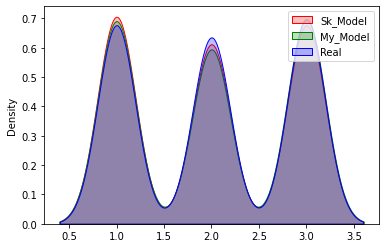

In [101]:
sns.kdeplot(test_yhat,color='r',shade=True,label='Sk_Model')
sns.kdeplot(yhat_test,color='g',shade=True,label='My_Model')
sns.kdeplot(test_y,color='b',shade=True,label='Real')
plt.legend()
plt.show()

### Table for Accuracy Scores

|Model|Accuracy Score-Training|Accuracy Score-Test|
|-|-|-|
|Sklearn|0.6642710472279261|0.6406374501992032|
|My Model Softmax Regression|0.6611909650924025|0.6390438247011953|

# ----------------------------Naive Bayes Gaussian Classifier-----------------------------

## ------------------------------------------Univariate Section------------------------------------------

### DataFrame for Multivariate Section

In [102]:
uni_data = data.copy()

### Class: 1-8->1, 9-10->2, Rest->3

#### I have merged the classes as given above as it produces great accuracy metrics and is given in the 3rd point in "alabone.names" file.

In [103]:
one = tuple(range(1,9))
two = tuple(range(9,11))

for i in range(len(uni_data)):
    if uni_data.at[i,'Rings'] in one:
        uni_data.at[i,'Rings'] = 1
    elif uni_data.at[i,'Rings'] in two:
        uni_data.at[i,'Rings'] = 2
    else:
        uni_data.at[i,'Rings'] = 3
uni_data['Rings'].value_counts()

3    1447
1    1407
2    1323
Name: Rings, dtype: int64

### Histograms for all Features Categorised by their respective Output Class 

Class: 1


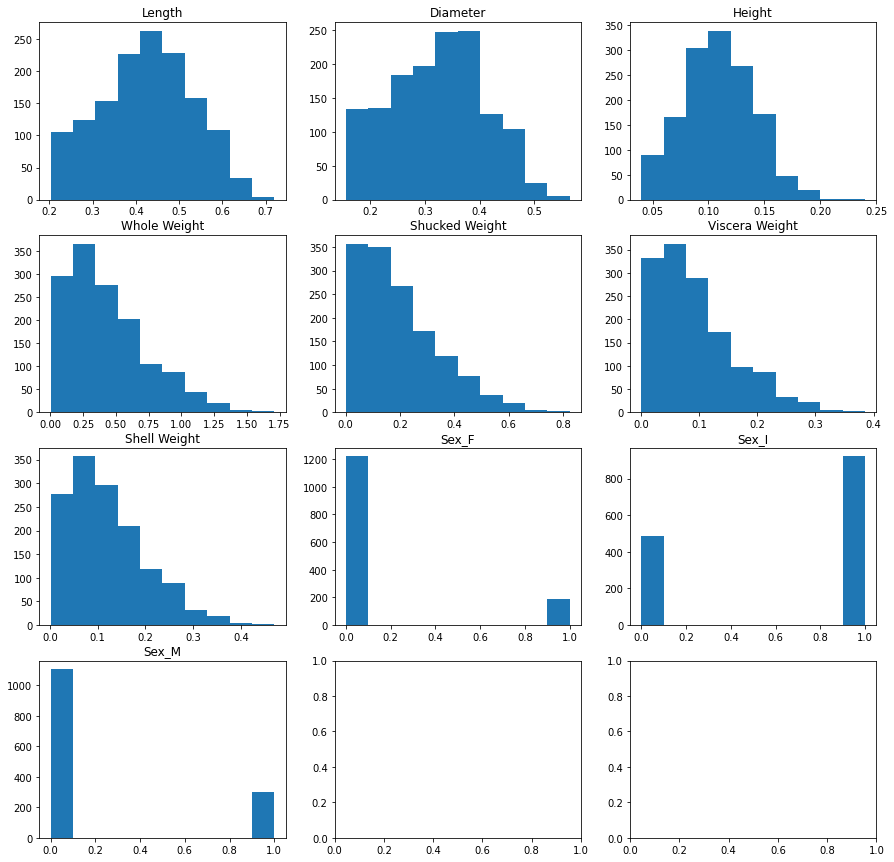

Class: 2


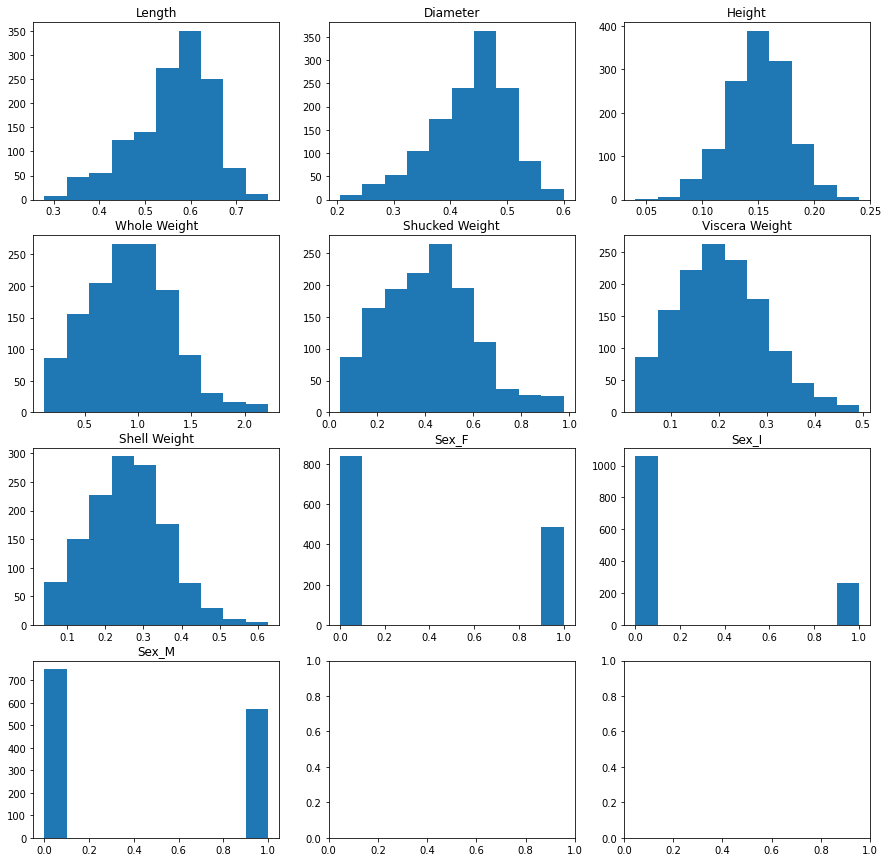

Class: 3


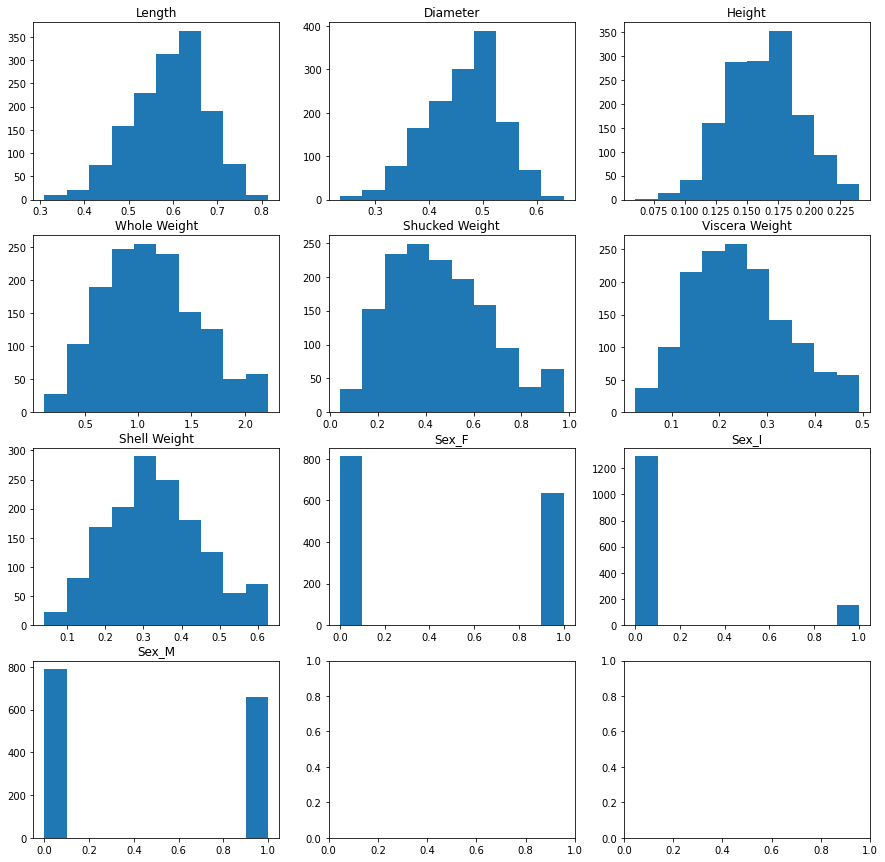

In [104]:
full_x = uni_data.drop(labels='Rings',axis='columns').to_numpy().astype(np.float64)
for k in np.unique(uni_data.Rings):
    print('Class:',k)
    arr = np.where(uni_data.Rings == k)
    x = full_x[arr[0]]
    fig, axis = plt.subplots(4,3,figsize=(15,15))
    axis[0,0].hist(x.T[0])
    axis[0,0].set_title('Length')
    axis[0,1].hist(x.T[1])
    axis[0,1].set_title('Diameter')
    axis[0,2].hist(x.T[2])
    axis[0,2].set_title('Height')
    axis[1,0].hist(x.T[3])
    axis[1,0].set_title('Whole Weight')
    axis[1,1].hist(x.T[4])
    axis[1,1].set_title('Shucked Weight')
    axis[1,2].hist(x.T[5])
    axis[1,2].set_title('Viscera Weight')
    axis[2,0].hist(x.T[6])
    axis[2,0].set_title('Shell Weight')
    axis[2,1].hist(x.T[7])
    axis[2,1].set_title('Sex_F')
    axis[2,2].hist(x.T[8])
    axis[2,2].set_title('Sex_I')
    axis[3,0].hist(x.T[9])
    axis[3,0].set_title('Sex_M')
    plt.show()

#### From above we can infer that 4th to 7th features are skewed to the right in all classes. Hence we are applying np.log() for those feature rows

In [105]:
arr = np.where(uni_data.Rings == 1)
x = uni_data.to_numpy().astype(np.float64)
for i in arr[0]:
    for j in range(3,7):
        x[i][j] = np.log(x[i][j])
columns = ['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M']
col = {columns[i]: x[:,i] for i in range(len(columns))}
uni_data = pd.DataFrame(col)

#### Final Result of Histogram Plots

Class: 1.0


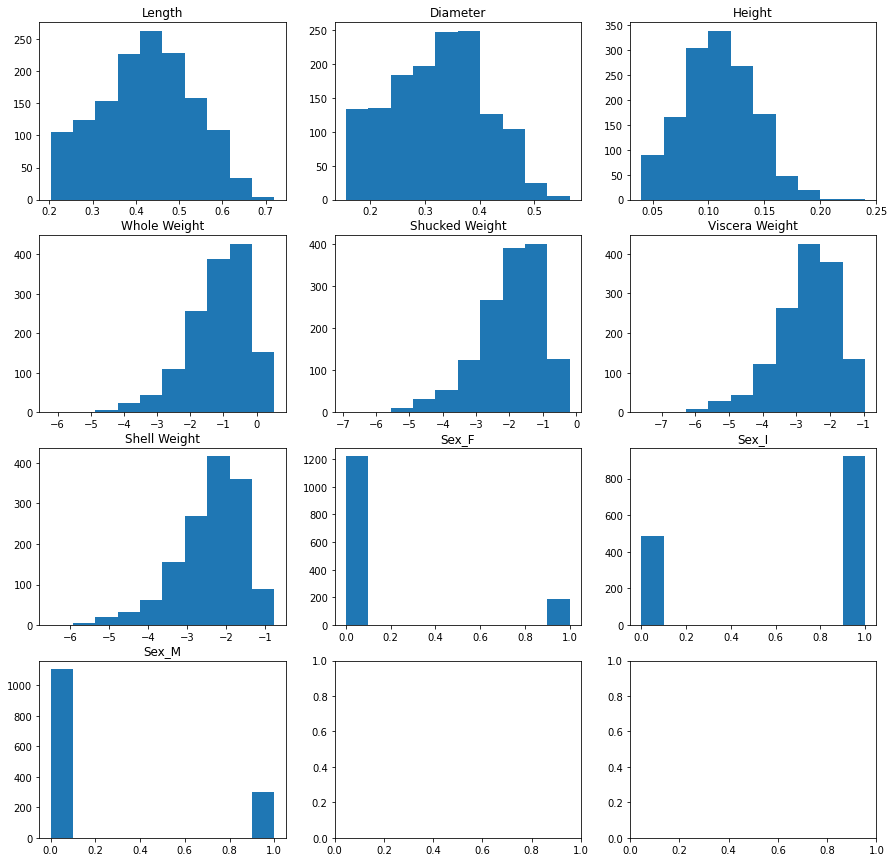

Class: 2.0


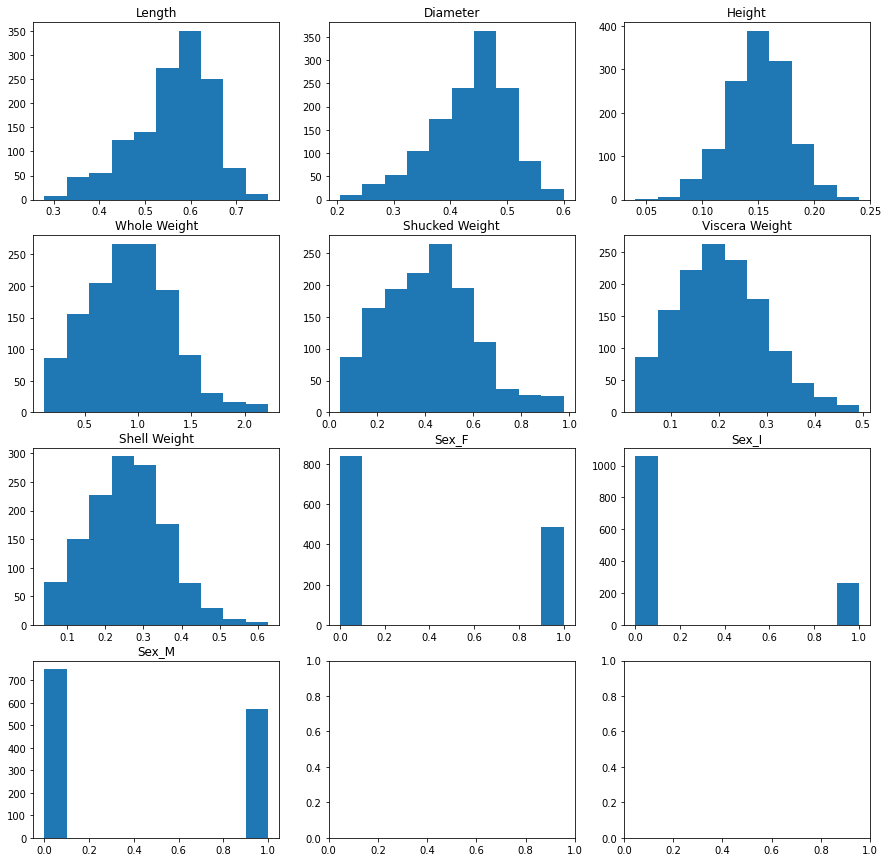

Class: 3.0


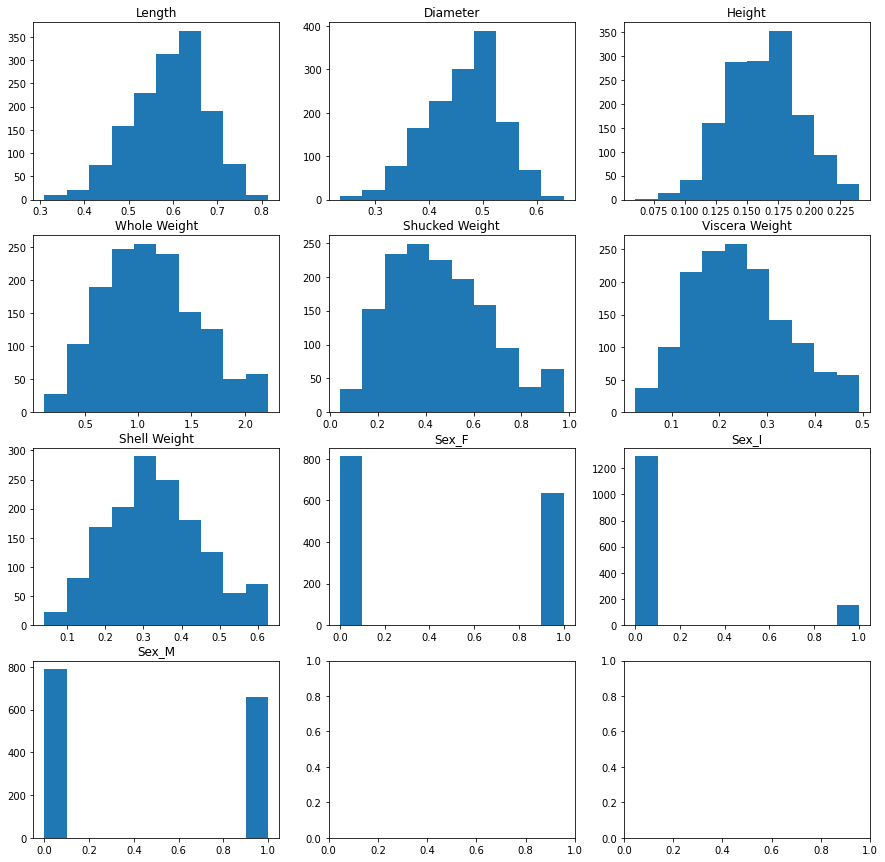

In [106]:
full_x = uni_data.drop(labels='Rings',axis='columns').to_numpy().astype(np.float64)
for k in np.unique(uni_data.Rings):
    print('Class:',k)
    arr = np.where(uni_data.Rings == k)
    x = full_x[arr[0]]
    fig, axis = plt.subplots(4,3,figsize=(15,15))
    axis[0,0].hist(x.T[0])
    axis[0,0].set_title('Length')
    axis[0,1].hist(x.T[1])
    axis[0,1].set_title('Diameter')
    axis[0,2].hist(x.T[2])
    axis[0,2].set_title('Height')
    axis[1,0].hist(x.T[3])
    axis[1,0].set_title('Whole Weight')
    axis[1,1].hist(x.T[4])
    axis[1,1].set_title('Shucked Weight')
    axis[1,2].hist(x.T[5])
    axis[1,2].set_title('Viscera Weight')
    axis[2,0].hist(x.T[6])
    axis[2,0].set_title('Shell Weight')
    axis[2,1].hist(x.T[7])
    axis[2,1].set_title('Sex_F')
    axis[2,2].hist(x.T[8])
    axis[2,2].set_title('Sex_I')
    axis[3,0].hist(x.T[9])
    axis[3,0].set_title('Sex_M')
    plt.show()

#### Now all Features look good to fit Gaussians upon

### Data Splitting

#### From EDA, we have 'Length' and 'Diameter' highly correlated, hence dropping 'Diameter'. Rest of the features are included as this combination produces good accuracy.

In [107]:
x_columns = ['Length','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Sex_F','Sex_I','Sex_M']
x = uni_data.loc[:,x_columns].to_numpy().astype(np.float64)
y = uni_data.Rings.to_numpy().astype(np.float64)
train_x, test_x, train_y, test_y = split_data_stratify(x,y,0.7)

### Sklearn - Univariate Naive Bayes Classifier

#### Model to Predict Output Label 'Rings'

In [108]:
skmodel = GaussianNB()
skmodel.fit(train_x,train_y)

GaussianNB()

#### Prediction

In [109]:
train_yhat = skmodel.predict(train_x)
test_yhat = skmodel.predict(test_x)

#### Accuracy Score

##### For Training Data

In [110]:
accuracy_score(train_y,train_yhat)

0.7152635181382615

##### For Test Data

In [111]:
accuracy_score(test_y,test_yhat)

0.7402390438247012

### My Implementation - Univariate Naive Bayes Classifier

In [112]:
class UnivariateNaiveBayesClassifier:
    def __init__(self) -> None:
        """Constructor
        """
        pass
    
    def class_probs(self,train_y:np.ndarray) -> None:
        """Calculates and stores the probabilities of each class

        Args:
            train_y (np.ndarray): Training Labels
        """
        self.probs = []
        den = len(train_y)
        for k in self.classes:
            arr = np.where(train_y == k)
            self.probs.append(len(arr[0])/den)
        self.probs = np.array(self.probs)
    
    def fit(self,train_x:np.ndarray,train_y:np.ndarray) -> None:
        """Performs fitting of gaussians for each feature of each class

        Args:
            train_x (np.ndarray): Training features
            train_y (np.ndarray): Training Labels
        """
        self.classes = np.unique(train_y)
        self.features = len(train_x[0])
        self.mu = np.zeros((len(self.classes),self.features),dtype=np.float64)
        self.sigma = np.zeros((len(self.classes),self.features),dtype=np.float64)
        self.class_probs(train_y)
        for k,i in zip(self.classes,range(len(self.classes))):
            arr = np.where(train_y == k)
            for feature in range(self.features):
                temp = []
                for index in arr[0]:
                    temp.append(train_x[index][feature])
                self.mu[i][feature] = np.mean(temp)
                self.sigma[i][feature] = np.std(temp)
    
    def gaussian(self,x:float,mu:float,sigma:float) -> float:
        """Calculates the probability of the feature for given gaussian parameters

        Args:
            x (float): Feature value
            mu (float): Mean
            sigma (float): Standard deviation

        Returns:
            float: Value of probability
        """
        return (np.exp(-(((x-mu)/sigma)**2)/2))/(np.sqrt(2*np.pi)*sigma)
    
    def predict(self,test_x:np.ndarray) -> np.ndarray:
        """Predicts the output label for the input features

        Args:
            test_x (np.ndarray): Test features

        Returns:
            np.ndarray: Predicted output labels
        """
        ans = []
        count = 0
        for xi in test_x:
            index,high = None,-1
            for k in range(len(self.classes)):
                prob = self.probs[k]
                for feature in range(self.features):
                    prob *= self.gaussian(xi[feature],self.mu[k][feature],self.sigma[k][feature])
                if prob > high:
                    high = prob
                    index = k
            ans.append(self.classes[index])
        return np.array(ans)

#### Model For Predicting 'Rings' Label

In [113]:
nbcmodel = UnivariateNaiveBayesClassifier()
nbcmodel.fit(train_x,train_y)

#### Prediction

In [114]:
yhat_train = nbcmodel.predict(train_x)
yhat_test = nbcmodel.predict(test_x)

#### Accuracy Score

##### For Training Data

In [115]:
accuracy_score(train_y,yhat_train)

0.7152635181382615

##### For Test Data

In [116]:
accuracy_score(test_y,yhat_test)

0.7402390438247012

#### Kdeplot for Real, My_Model, Sklearn Output Predictions

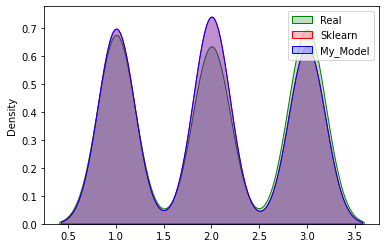

In [117]:
sns.kdeplot(test_y,color='g',label='Real',shade=True)
sns.kdeplot(test_yhat,color='r',label='Sklearn',shade=True)
sns.kdeplot(yhat_test,color='b',label='My_Model',shade=True)
plt.legend()
plt.show()

### Table of Accuracy Scores

|Model|Accuracy Score-Training|Accuracy Score-Test|
|-|-|-|
|Sklearn|0.7152635181382615|0.7402390438247012|
|My Model Univariate Gaussian Classifier|0.7152635181382615|0.7402390438247012|

## -----------------------------------------Multivariate Section-----------------------------------------

### We select those features for whose histogram distribution shall fit a good gaussian for all classes i.e. a feature should provide good accuracy for a Univariate Naive Bayes Gaussian Model.

#### Histograms for all Features Categorised by their respective Output Class 

#### From above sub-plots in Univariate Naive Bayes Gaussian Classifier, we can clearly infer that features 'Length', 'Height', 'Shell Weight', 'Viscera Weight' will provide good accuracy for Multivariate Gaussian Classifier. Hence we shall select the above features to learn and predict upon and drop the rest